In [1]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

from scipy import integrate

import os
import os.path as path
import wget

from tqdm import tqdm
import corner

In [4]:
sample = np.array([0.974,0.950,0.932,1.104,1.038,0.920,0.935,0.907,0.810,0.915])

In [5]:
media = np.mean(sample)
print(media)

0.9484999999999999


In [6]:
def Resample(sample):
    resample_ = np.random.choice(sample, size=len(sample), replace=True) # remuestreo con reemplazo
    return resample_

In [21]:
# Descargamos data
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/*

file = 'Data/data.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

rm: no se puede borrar 'Data/*': No existe el archivo o el directorio
100% [..................................................................................] 521 / 521File loaded


In [22]:
Data = np.loadtxt(Path_)

In [23]:
x = Data[:,0]
y = Data[:,1]
N = len(x)
sigma = np.random.uniform(1,4,size=N)
sigma

array([2.62234244, 2.17647584, 2.17818411, 1.39812128, 3.05963145,
       3.42263153, 1.81365513, 3.26926834, 1.78384232, 3.20594048,
       3.45694961, 1.2754592 , 2.21392283, 1.39614931, 1.00755947,
       1.77215488, 3.40432693, 2.31973762, 2.99167524, 3.57751934])

In [24]:
def GetFit(x,y,n=3):
    
    size = len(x)
    b = y
    
    A = np.ones((size,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**(i)

    # Hacer ajuste cuadratico
    
    M = np.dot(A.T,A)
    bt = np.dot(A.T,b)
    
    xsol = np.linalg.solve(M,bt)

    return xsol

In [25]:
n = 2 # order of the polynomial
param = GetFit(x,y,n=n)
print(param)

[1.22132054 6.09075205 2.9565874 ]


In [26]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
    
    return y

In [27]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

2.9565874017739*x**2 + 6.09075204636184*x + 1.22132053617134

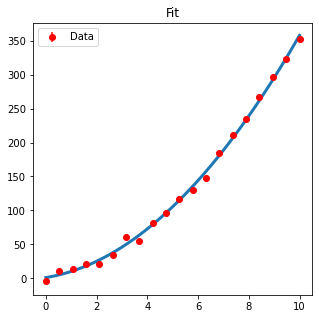

In [28]:
t = np.linspace(np.min(x),np.max(x),100)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x,y,yerr=sigma,fmt='o',color='r',label='Data')
ax.set_title('Fit')
ax.plot(t,GetModel(t,param),lw=3) 
#ax.plot(t,GetModel(t,param), label="Parameters: {0}".format(np.round(param,2))) 
ax.legend(loc=0)

# Bootstraping

In [31]:
# Necesitamos hacer un diccionario para ligar la variable y la imagen
dict1 = dict(zip(x,y))